In [1]:
import spheroidal
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from mpmath import mp
from spheroidal import *
from mpmath import mpc, mpf
import mpmath

In [2]:
spheroidal.eigenvalue_leaver(-2,2,2,1.5,prec=30)

mpf('-5.57762736467882618910285393264128')

In [3]:
spheroidal.harmonic_leaver(-2,2,2,1.5,prec=30,n_max=1000)(mpf(1),0)

mpc(real='0.294861641927613816607911544024435', imag='0.0')

In [14]:
spheroidal.eigenvalue_leaver(-2,17,2,1.5)

-5.577627364678819

In [45]:
spheroidal.harmonic(-2,11,2,1.5,method="leaver")(pi/2,0)

(-0.0003162126995448489+0j)

In [46]:
spheroidal.harmonic(-2,11,2,1.5,method="spectral")(pi/2,0)

(-0.030124226156603554+0j)

/Users/spark59/anaconda3/envs/spheroidal-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/spark59/anaconda3/envs/spheroidal-env/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


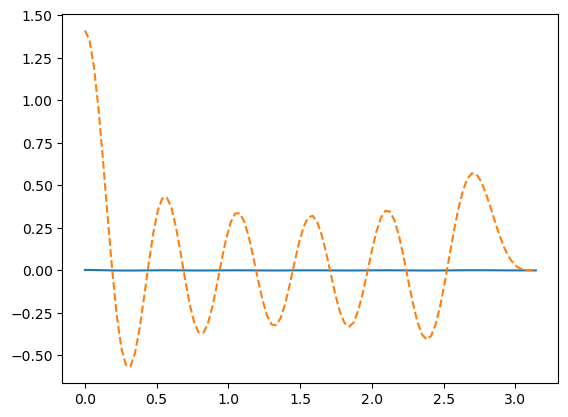

In [47]:
th = np.linspace(0,pi,100)
S_leaver = spheroidal.harmonic(-2,12,2,1.5,method="leaver")
S_spectral = spheroidal.harmonic(-2,12,2,1.5,method="spectral")
plt.plot(th,S_leaver(th,0))
plt.plot(th,S_spectral(th,0),linestyle="--")

In [52]:
from scipy.special import hyp2f1, binom,factorial
from scipy.integrate import quad
from numpy import sqrt

def Y_leaver(s,l,m):
    eigenvalue = l*(l+1)-s*(s+1)
    k1 = 1 / 2 * abs(m - s)
    k2 = 1 / 2 * abs(m + s)
    prefactor = sqrt(
        factorial(l + m)
        * factorial(l - m)
        * (2 * l + 1)
        / (4 * pi * factorial(l + s) * factorial(l - s))
    )*binom(l+s,abs(m-s))
    
    def Y(theta,phi):
        u = np.cos(theta)
        return prefactor*(1+u)**k1*(1-u)**k2*hyp2f1(0.5 + k1 + k2 - sqrt(1 + 4*s + 4*s**2 + 4*eigenvalue)/2.,
        0.5 + k1 + k2 + sqrt(1 + 4*s + 4*s**2 + 4*eigenvalue)/2.,1 + 2*k1,(1+u)/2.)*np.exp(1j*m*phi)
    
    # y2 = lambda theta: np.sin(theta)*np.real(Y(theta,0))**2
    # norm = quad(y2,0,pi)[0]

    return lambda theta,phi: Y(theta,phi)#/np.sqrt(2*np.pi*norm)

/Users/spark59/anaconda3/envs/spheroidal-env/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/spark59/anaconda3/envs/spheroidal-env/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


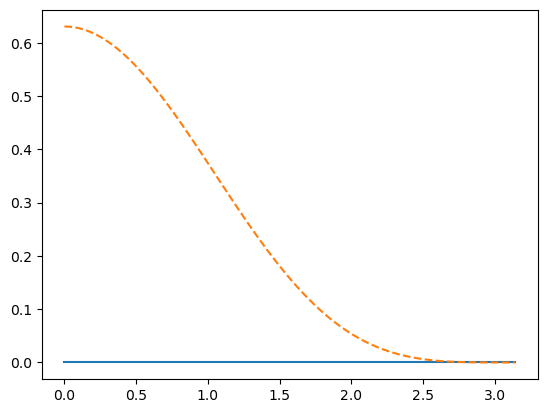

In [53]:
Y1 = Y_leaver(-2,2,2)
Y2 = spheroidal.sphericalY(-2,2,2)
th = np.linspace(0,pi,100)
plt.plot(th,Y1(th,0))
plt.plot(th,Y2(th,0),linestyle='--')

In [120]:
Y_leaver(-1/2,1/2,1/2)(pi/2,0)

(0.28209479177387814+0j)

In [121]:
spheroidal.sphericalY(-1/2,1/2,1/2)(pi/2,0)

(5.1819972570302854e-17+0.2820947917738782j)

In [39]:
spheroidal.harmonic_spectral(-2,2,2,1.5,50)(pi/2,0)

(0.06692950919170586+0j)

In [9]:
mp.dps = 30
spheroidal.mp_leaver.eigenvalue_leaver(-2,2,2,1.5)

mpf('-5.57762736467882618910285393264128')

In [23]:
spheroidal.leaver_coefficients(2,3,2,1.5)

array([ 9.30965057e-01, -6.65118530e+00,  1.36252389e+01, -1.59532850e+01,
        1.30738611e+01, -8.25604503e+00,  4.24780973e+00, -1.84635867e+00,
        6.95413289e-01, -2.31249303e-01,  6.88772139e-02, -1.85855123e-02,
        4.58553084e-03, -1.04241491e-03,  2.19745415e-04, -4.31925268e-05,
        7.95356884e-06, -1.37775435e-06,  2.25327324e-07, -3.49048234e-08,
        5.13610456e-09, -7.19746383e-10,  9.62796187e-11, -1.23201833e-11,
        1.51100430e-12, -1.77929169e-13,  2.01496050e-14, -2.19773362e-15,
        2.31190834e-16, -2.34872747e-17,  2.30657243e-18, -2.19532861e-19,
        2.00983423e-20, -1.86371651e-21,  1.25199665e-22, -3.01137183e-23,
       -8.00797652e-24, -4.96321120e-24, -2.60563023e-24, -1.39764937e-24,
       -7.46084983e-25, -3.97894597e-25, -2.11899993e-25, -1.12702392e-25,
       -5.98677784e-26, -3.17638377e-26, -1.68334346e-26, -8.91110359e-27,
       -4.71223796e-27, -2.48929795e-27, -1.31370111e-27, -6.92630292e-28,
       -3.64843024e-28, -

In [17]:
spheroidal.harmonic_deriv(-2,2,2,1.5)(pi/2,0)

(-0.20852146386265577+0j)

In [3]:
spheroidal.harmonic_deriv(-2,2,2,1.5,n_theta=2,n_phi=2)(pi/2,0)

(-2.0955970306140754+0j)

In [12]:
spheroidal.sphericalY_deriv(-2,2,2)(pi/4,0)

(-0.38071129714535656+0j)

In [4]:
spheroidal.harmonic_leaver_deriv(-2,2,2,1.5)(pi/4,0)

(0.7357188572646636+0j)

In [15]:
spheroidal.harmonic_spectral(-2,2,2,1+1.5j,10)(pi/2,0)

(0.06350555182825346-0.07905330857257169j)

In [2]:
spheroidal.sphericalY(s=-0.5, l=10.5, m=0.5)(0,0)

(4.2138107434900204e-15+1.3231418571003069j)

In [7]:
spheroidal.harmonic_spectral(-2,2,2,1.5,90)(pi/2,0)

(0.0669295091917058+0j)

In [2]:
spheroidal.harmonic_leaver(1/2,1/2,1/2,1.5)(pi/2,0)

(1.1176603999059102e-17+0.18252779506451233j)

In [5]:
%timeit spheroidal.spectral_matrix_bands(-2,2,1.5,100)

56 µs ± 376 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [2]:
spheroidal.eigenvalue(s=-1.5, ell=5.5, m=-1.5,g=1.5,method="spectral")

41.06089610882192

In [4]:
spheroidal.harmonic(s=-1.5, ell=1.5, m=-1.5,g=1.5,method="spectral")(pi/2,0)

(-6.088893243961896e-17-0.2791611796070384j)

In [8]:
spheroidal.sphericalY(-1/2,1/2,1/2)(pi/2,0)

(5.1819972570302854e-17+0.2820947917738782j)

In [5]:
spheroidal.harmonic_leaver_deriv(-2,3,2, 1.5)(0,0)

(3.443603576680373e-14+0j)

In [61]:
s,m,g = -2,2,1.5
spheroidal.eigenvalue(-2,10,2,1.5,method="spectral")-g**2+2*m*g

106.77119720153948

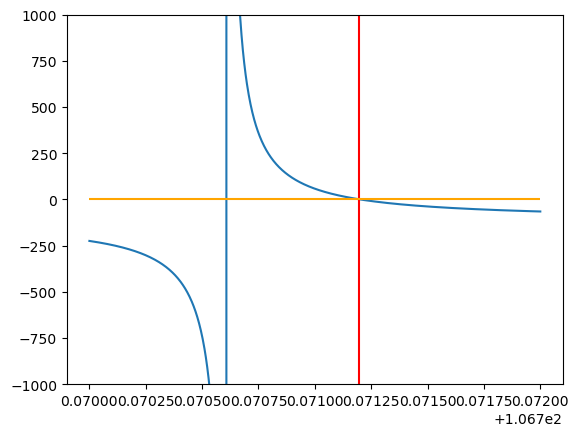

In [86]:
A = np.linspace(106.77,106.772,1000)
plt.plot(A,[spheroidal.continued_fraction(A,-2,8,2,1.5) for A in A])
plt.vlines(106.77119720153948,-10000,10000,color="red")
plt.ylim(-1000,1000)
plt.hlines(0,106.77,106.772,color="orange")

In [47]:
s,m,g = -2,2,1.5
spheroidal.eigenvalue(-2,14,2,1.5,method="spectral")-g**2+2*m*g

206.82248991048613

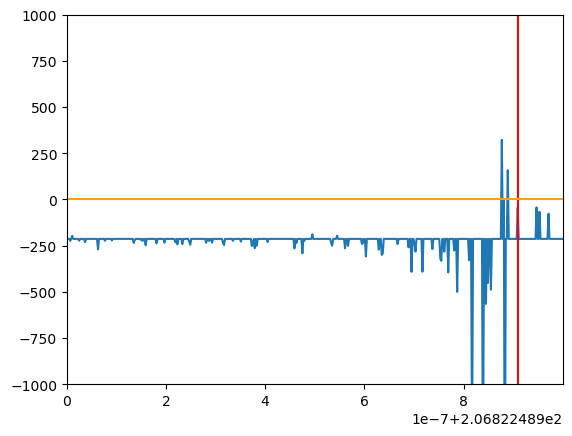

In [109]:
A = np.linspace(206.822485,206.822495,5000)
plt.plot(A,[spheroidal.continued_fraction(A,-2,14,2,1.5) for A in A])
plt.vlines(206.82248991048613,-10000,10000,color="red")
plt.ylim(-1000,1000)
plt.xlim(206.822489,206.82249)
plt.hlines(0,206.822485,206.822495,color="orange")

In [62]:
from sympy.physics.quantum.cg import CG as clebsch_gordan
from numpy import sqrt

def c1(s, m, j, l):
    return (
        sqrt((2 * l + 1) / (2 * j + 1))
        * float(clebsch_gordan(l, m, 1, 0, j, m).doit())
        * float(clebsch_gordan(l, -s, 1, 0, j, -s).doit())
    )

def c2(s, m, j, l):
    return (1 / 3 if j == l else 0) + 2 / 3 * sqrt((2 * l + 1) / (2 * j + 1)) * float(
        clebsch_gordan(l, m, 2, 0, j, m).doit()
    ) * float(clebsch_gordan(l, -s, 2, 0, j, -s).doit())

def diag0(s,m,g,l):
    if l >= 1:
        return (-(l*(1 + l)) + (2*g*m*s**2)/(l + l**2) + 
                (g**2*(1 + (2*(l + l**2 - 3*m**2)*(l + l**2 - 3*s**2))/
                (l*(-3 + l + 8*l**2 + 4*l**3))))/3)
    if l == 1/2:
        return g**2/3 - 3/4 + (8*g*m*s**2)/3
    if l == 0:
        return g**2/3
    
def diag1(s,m,g,l):
    if l >= 1/2:
        return (-2*(-1)**(2*(l + m))*g*(2*l + l**2 + g*m)*s*
                sqrt(((1 + 2*l)*(1 + 2*l + l**2 - m**2)*(1 + 2*l + l**2 - s**2))/(3 + 2*l))
                )/(l*(2 + l)*(1 + 3*l + 2*l**2))
    if l == 0:
        return (-2*(-1)**(2*m)*g*s*sqrt((1 - m**2)*(1 - s**2)))/sqrt(3)
    
def diag2(s,m,g,l):
    return ((-1)**(2*(l + m))*g**2*
          sqrt(((1 + l - m)*(2 + l - m)*(1 + l + m)*(2 + l + m)*(1 + l - s)*
              (2 + l - s)*(1 + l + s)*(2 + l + s))/
            ((1 + l)**2*(2 + l)**2*(1 + 2*l)*(3 + 2*l)**2*(5 + 2*l))))